# Set-Up

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mv your_dataset_name.csv /content/your_dataset_name.csv

mv: cannot stat 'your_dataset_name.csv': No such file or directory


In [3]:
# Create the Kaggle folder & Move the Kaggle token file into it

import os
import shutil

kaggle_dir = '/root/.kaggle'

if not os.path.exists(kaggle_dir):
  os.makedirs(kaggle_dir)

source = '/content/kaggle.json'
destination = '/root/.kaggle/kaggle.json'

if os.path.exists(source):
  shutil.move(source, destination)

In [4]:
# Change permissions to the Kaggle token file

!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# Download the dataset from Kaggle site

# URL of the page: https://www.kaggle.com/datasets/START-UMD/gtd

!kaggle datasets download -d START-UMD/gtd

Dataset URL: https://www.kaggle.com/datasets/START-UMD/gtd
License(s): other
 98% 28.0M/28.7M [00:00<00:00, 40.4MB/s]
100% 28.7M/28.7M [00:00<00:00, 33.2MB/s]


In [6]:
# Unzip the file in the same Colab directory

!unzip /content/gtd.zip -d /content/

Archive:  /content/gtd.zip
  inflating: /content/globalterrorismdb_0718dist.csv  


# EDA

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
gtd=pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')
gtd.head(5)

<ipython-input-10-2786253291b3>:1: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  gtd=pd.read_csv('/content/globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [11]:
gtd.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
gtd.info

<bound method DataFrame.info of              eventid  iyear  imonth  iday approxdate  extended resolution  \
0       197000000001   1970       7     2        NaN         0        NaN   
1       197000000002   1970       0     0        NaN         0        NaN   
2       197001000001   1970       1     0        NaN         0        NaN   
3       197001000002   1970       1     0        NaN         0        NaN   
4       197001000003   1970       1     0        NaN         0        NaN   
...              ...    ...     ...   ...        ...       ...        ...   
181686  201712310022   2017      12    31        NaN         0        NaN   
181687  201712310029   2017      12    31        NaN         0        NaN   
181688  201712310030   2017      12    31        NaN         0        NaN   
181689  201712310031   2017      12    31        NaN         0        NaN   
181690  201712310032   2017      12    31        NaN         0        NaN   

        country         country_txt  region  ... addnotes  \
0            58  Dominican Republic       2  ...      NaN   
1           130              Mexico       1  ...      NaN   
2           160         Philippines       5  ...      NaN   
3            78              Greece       8  ...      NaN   
4           101               Japan       4  ...      NaN   
...         ...                 ...     ...  ...      ...   
181686      182             Somalia      11  ...      NaN   
181687      200               Syria      10  ...      NaN   
181688      160         Philippines       5  ...      NaN   
181689       92               India       6  ...      NaN   
181690      160         Philippines       5  ...      NaN   

                                                   scite1  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Somalia: Al-Shabaab Militants Attack Army Che...   
181687  "Putin's 'victory' in Syria has turned into a ...   
181688  "Maguindanao clashes trap tribe members," Phil...   
181689  "Trader escapes grenade attack in Imphal," Bus...   
181690  "Security tightened in Cotabato following IED ...   

                                                   scite2  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 2 ...   
181687  "Two Russian soldiers killed at Hmeymim base i...   
181688                                                NaN   
181689                                                NaN   
181690  "Security tightened in Cotabato City," Manila ...   

                                                   scite3  \
0                                                     NaN   
1                                                     NaN   
2                                                     NaN   
3                                                     NaN   
4                                                     NaN   
...                                                   ...   
181686  "Highlights: Somalia Daily Media Highlights 1 ...   
181687  "Two Russian servicemen killed in Syria mortar...   
181688                                                NaN   
181689                                                NaN   
181690                                                NaN   

                        dbsource  INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0                           PGI

In [13]:
gtd.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [14]:
gtd.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type'
                    },inplace=True)

In [15]:
gtd = gtd[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','summary','Group','Target_type','Weapon_type','motive','success']]

In [16]:
gtd.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
state             421
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
summary         66129
Group               0
Target_type         0
Weapon_type         0
motive         131130
success             0
dtype: int64

In [17]:
gtd_new=gtd.dropna(axis=0)

In [18]:
gtd_new.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,summary,Group,Target_type,Weapon_type,motive,success
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,Armed Assault,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,1
8,197001020003,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,Facility/Infrastructure Attack,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,1
9,197001030001,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,Facility/Infrastructure Attack,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,1
11,197001060001,1970,1,6,United States,North America,Colorado,Denver,39.758968,-104.876305,Facility/Infrastructure Attack,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,1
14,197001090002,1970,1,9,United States,North America,Puerto Rico,Rio Piedras,18.386932,-66.061127,Facility/Infrastructure Attack,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,1


In [19]:
# Number of attacks per country
attacks_per_country = gtd_new['Country'].value_counts()
print(attacks_per_country.head(10))  # Top 10 countries
# Number of attacks per year
attacks_per_year = gtd_new['Year'].value_counts().sort_index()
print(attacks_per_year)

Country
Iraq             8810
India            5427
Pakistan         4900
Afghanistan      3206
Philippines      2253
Thailand         1782
Russia           1488
United States    1426
Colombia         1389
Algeria          1328
Name: count, dtype: int64
Year
1970     222
1971     111
1972      40
1973      25
1974      40
1975      26
1976      30
1977      18
1978      41
1979      13
1980      23
1981      22
1982      27
1983      20
1984      46
1985      26
1986      37
1987      27
1988      28
1989      29
1990      27
1991      28
1992      28
1994      34
1995      25
1996      13
1997      20
1998     759
1999    1231
2000    1597
2001    1771
2002    1223
2003    1139
2004    1012
2005    1781
2006    2424
2007    2880
2008    4341
2009    4447
2010    4722
2011    4875
2012    1890
2013    2387
2014    1898
2015    1788
2016    1693
2017    1670
Name: count, dtype: int64


In [20]:
max_year = attacks_per_year.idxmax()
print("Year with the most attacks:", max_year)

Year with the most attacks: 2011


In [21]:
year_attacks = gtd_new.groupby('Year').size().reset_index(name='count')

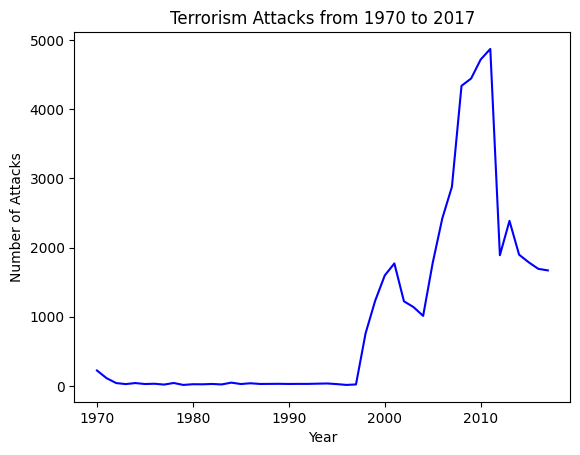

In [22]:
sns.lineplot(x='Year', y='count', data=year_attacks, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks from 1970 to 2017")
plt.show()

In [23]:
year_attacks_region = gtd_new.groupby(['Year','Region']).size().reset_index(name='count')

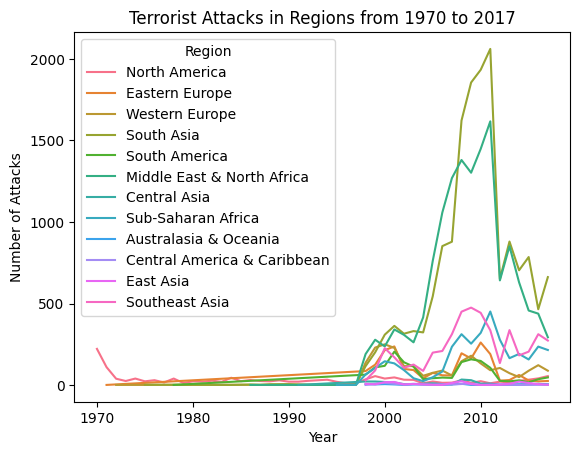

In [24]:
sns.lineplot(x='Year',y='count',hue='Region',data=year_attacks_region)
plt.title('Terrorist Attacks in Regions from 1970 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

<ipython-input-25-93928aa6c40f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attacks_per_region.values, y=attacks_per_region.index, palette="Greens_r")


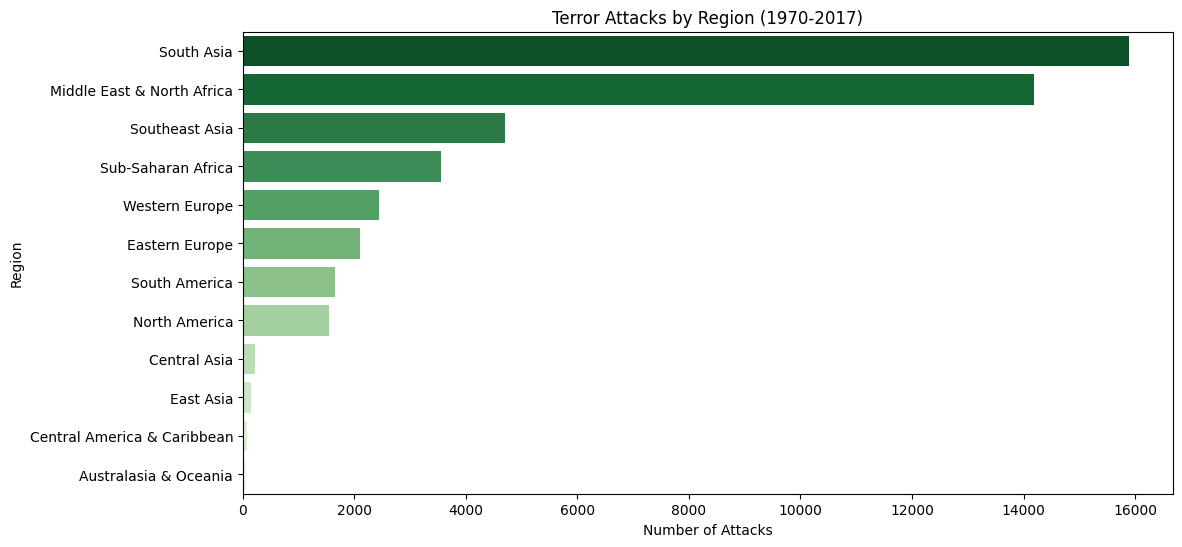

In [25]:
# Regional breakdown of attacks
attacks_per_region = gtd_new['Region'].value_counts()

# Plot regional distribution of attacks
plt.figure(figsize=(12,6))
sns.barplot(x=attacks_per_region.values, y=attacks_per_region.index, palette="Greens_r")
plt.title('Terror Attacks by Region (1970-2017)')
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()

AttackType
Bombing/Explosion                      23565
Armed Assault                          11037
Facility/Infrastructure Attack          3720
Hostage Taking (Kidnapping)             3479
Assassination                           3030
Unknown                                 1026
Unarmed Assault                          358
Hostage Taking (Barricade Incident)      199
Hijacking                                140
Name: count, dtype: int64


<ipython-input-26-8266974129af>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attack_types.values, y=attack_types.index, palette="Reds_r")


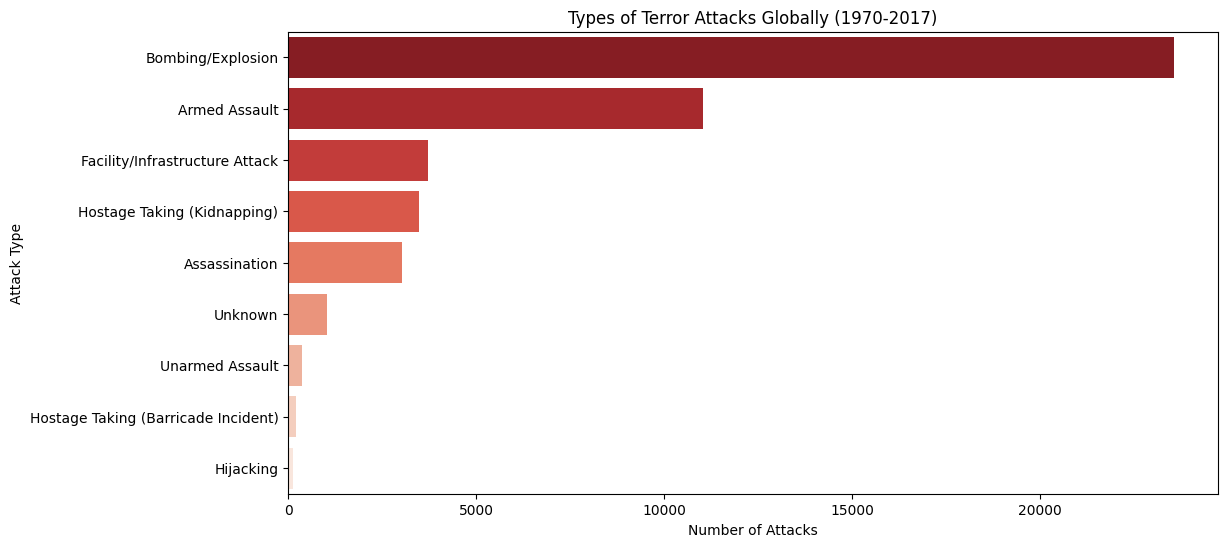

In [26]:
# Attack types
attack_types = gtd_new['AttackType'].value_counts()
print(attack_types)

# Plot attack types
plt.figure(figsize=(12,6))
sns.barplot(x=attack_types.values, y=attack_types.index, palette="Reds_r")
plt.title('Types of Terror Attacks Globally (1970-2017)')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.show()

<ipython-input-27-622c1a80c2cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_types.values, y=target_types.index, palette="Blues_r")


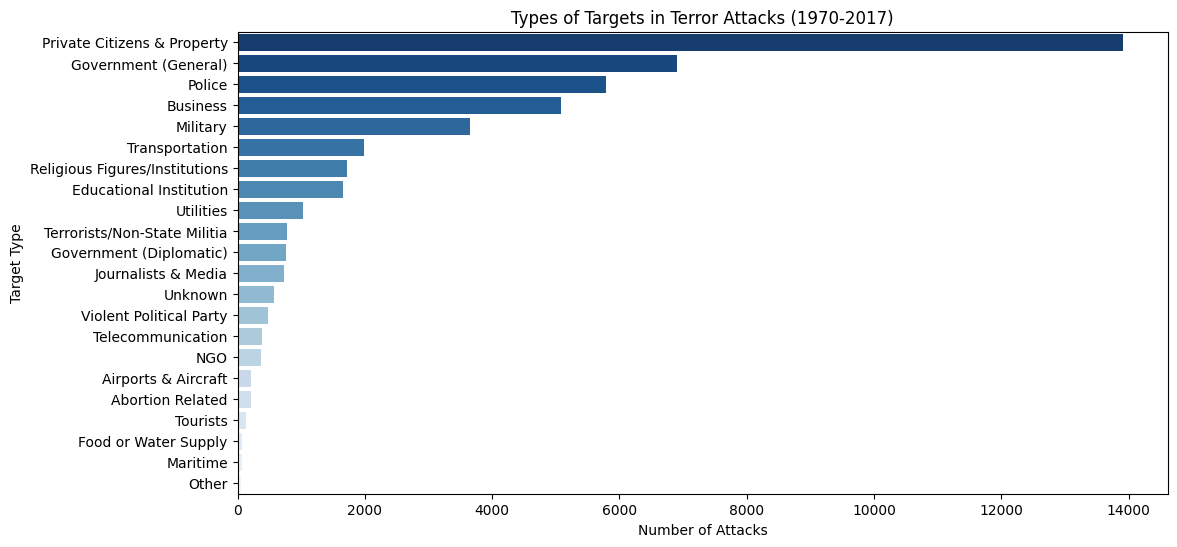

In [27]:
# Target types
target_types = gtd_new['Target_type'].value_counts()

# Plot target types
plt.figure(figsize=(12,6))
sns.barplot(x=target_types.values, y=target_types.index, palette="Blues_r")
plt.title('Types of Targets in Terror Attacks (1970-2017)')
plt.xlabel('Number of Attacks')
plt.ylabel('Target Type')
plt.show()

<ipython-input-28-e42cd471ac01>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weapon_types.values, y=weapon_types.index, palette="Purples_r")


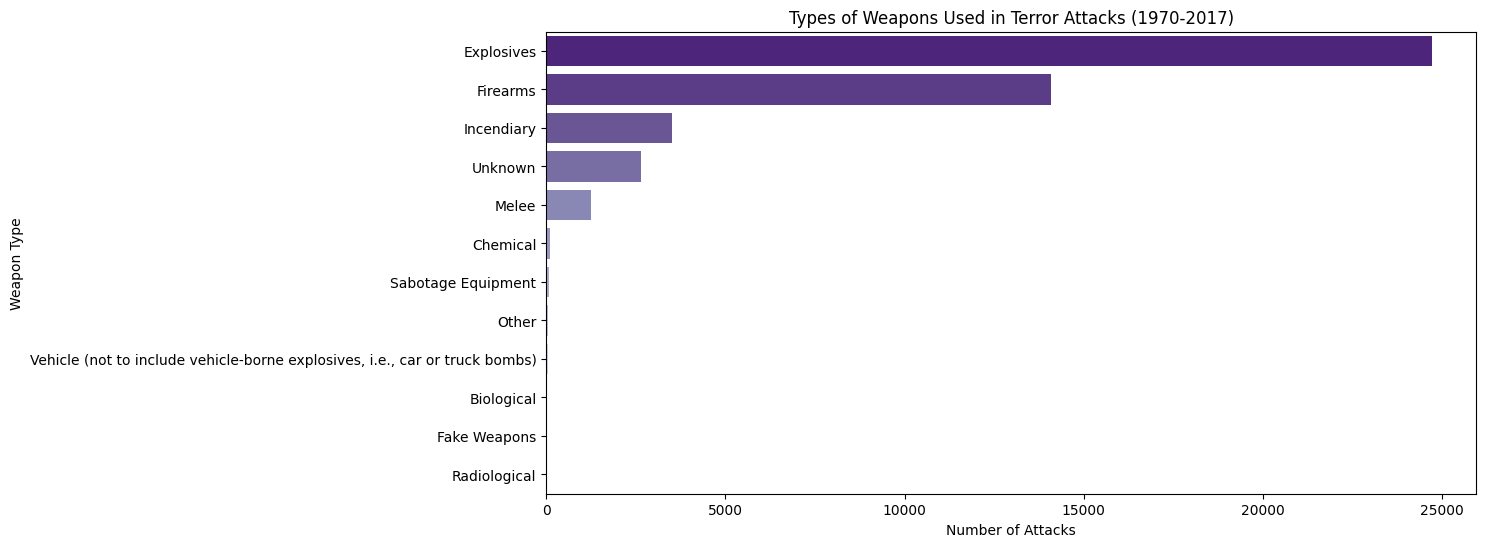

In [28]:
# Weapon types
weapon_types = gtd_new['Weapon_type'].value_counts()

# Plot weapon types
plt.figure(figsize=(12,6))
sns.barplot(x=weapon_types.values, y=weapon_types.index, palette="Purples_r")
plt.title('Types of Weapons Used in Terror Attacks (1970-2017)')
plt.xlabel('Number of Attacks')
plt.ylabel('Weapon Type')
plt.show()

<ipython-input-29-922ac04ae570>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=groups.values, y=groups.index, palette="Oranges_r")


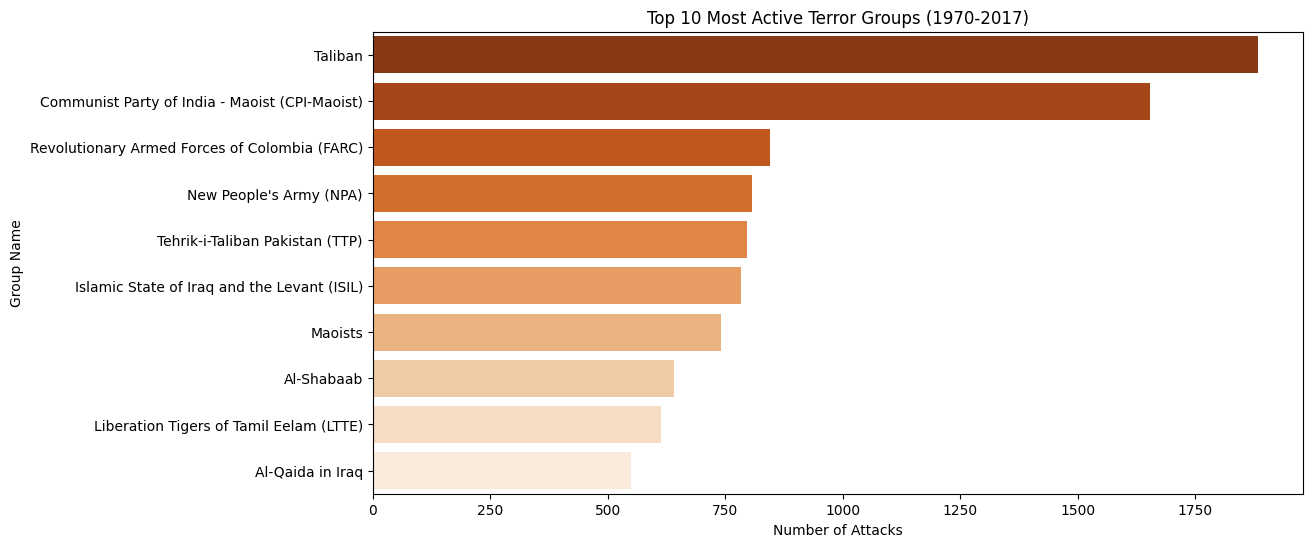

In [29]:
# Terror groups involved
groups = gtd_new['Group'].value_counts().drop('Unknown').head(10)

# Plot most active terror groups
plt.figure(figsize=(12,6))
sns.barplot(x=groups.values, y=groups.index, palette="Oranges_r")
plt.title('Top 10 Most Active Terror Groups (1970-2017)')
plt.xlabel('Number of Attacks')
plt.ylabel('Group Name')
plt.show()

<ipython-input-30-e534bae730a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_new['casualties'] = gtd_new['Killed'].fillna(0) + gtd_new['Wounded'].fillna(0)


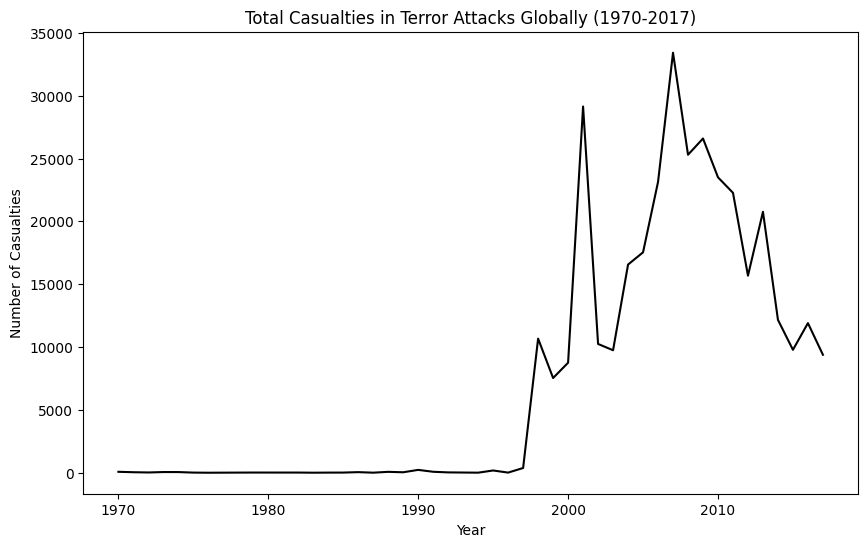

Year with the most casualties: 2007


In [30]:
# Total number of casualties (killed + wounded)
gtd_new['casualties'] = gtd_new['Killed'].fillna(0) + gtd_new['Wounded'].fillna(0)

# Casualties per year
casualties_per_year = gtd_new.groupby('Year')['casualties'].sum()

# Plot casualties over time
plt.figure(figsize=(10,6))
plt.plot(casualties_per_year, color='black')
plt.title('Total Casualties in Terror Attacks Globally (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Casualties')
plt.show()

year_max_casualties = casualties_per_year.idxmax()
print("Year with the most casualties:", year_max_casualties)

In [31]:
number_of_attempts = gtd_new.groupby('Year').size().reset_index(name='count')
number_of_attempts

,Year,count
0,1970,222
1,1971,111
2,1972,40
3,1973,25
4,1974,40
5,1975,26
6,1976,30
7,1977,18
8,1978,41
9,1979,13


In [33]:
weapon_success = gtd_new.groupby(['AttackType', 'success']).size().unstack(fill_value=0)
weapon_success['total'] = weapon_success.sum(axis=1)
weapon_success['success_percentage'] = (weapon_success[1] / weapon_success['total']) * 100
weapon_success['failure_percentage'] = (weapon_success[0] / weapon_success['total']) * 100
weapon_success

success,0,1,total,success_percentage,failure_percentage
AttackType,,,,,
Armed Assault,469,10568,11037,95.750657,4.249343
Assassination,1022,2008,3030,66.270627,33.729373
Bombing/Explosion,2123,21442,23565,90.990876,9.009124
Facility/Infrastructure Attack,162,3558,3720,95.645161,4.354839
Hijacking,19,121,140,86.428571,13.571429
Hostage Taking (Barricade Incident),4,195,199,97.989950,2.010050
Hostage Taking (Kidnapping),42,3437,3479,98.792757,1.207243
Unarmed Assault,80,278,358,77.653631,22.346369
Unknown,90,936,1026,91.228070,8.771930


<Figure size 1200x800 with 0 Axes>

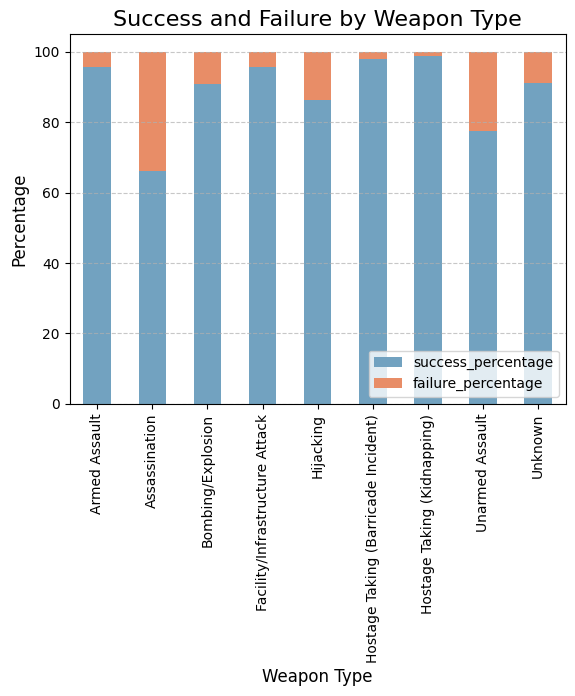

In [34]:
# Plotting the bar graph with custom styling
plt.figure(figsize=(12, 8))

# Use a custom color palette for better differentiation
colors = ["#72A2C0", "#E88D67"]  # You can choose your own colors for success and failure

weapon_success[['success_percentage', 'failure_percentage']].plot(kind='bar', stacked=True, color=colors)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set the title and axis labels
plt.title('Success and Failure by Weapon Type', fontsize=16)
plt.xlabel('Weapon Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.legend(loc='lower right')
plt.show()

In [35]:
# Filter data for India,USA and Iraq
gtd_india = gtd_new[gtd_new['Country'] == 'India']
gtd_usa = gtd_new[gtd_new['Country'] == 'United States']
gtd_iraq= gtd_new[gtd_new['Country'] == 'Iraq']
# Display basic info for each country
print(gtd_india.info())
print(gtd_usa.info())
print(gtd_iraq.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5427 entries, 2764 to 181672
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   eventid      5427 non-null   int64  
 1   Year         5427 non-null   int64  
 2   Month        5427 non-null   int64  
 3   Day          5427 non-null   int64  
 4   Country      5427 non-null   object 
 5   Region       5427 non-null   object 
 6   state        5427 non-null   object 
 7   city         5427 non-null   object 
 8   latitude     5427 non-null   float64
 9   longitude    5427 non-null   float64
 10  AttackType   5427 non-null   object 
 11  Killed       5427 non-null   float64
 12  Wounded      5427 non-null   float64
 13  Target       5427 non-null   object 
 14  summary      5427 non-null   object 
 15  Group        5427 non-null   object 
 16  Target_type  5427 non-null   object 
 17  Weapon_type  5427 non-null   object 
 18  motive       5427 non-null   object 
 19  succes

In [36]:
gtd_india.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,...,Killed,Wounded,Target,summary,Group,Target_type,Weapon_type,motive,success,casualties
2764,197501190004,1975,1,2,India,South Asia,Bihar,Samastipur,25.863042,85.781004,...,4.0,0.0,Lalit Narayan Mishra and a legislator,"1/2/1975: The Indian Railway Minister, Lalit N...",Ananda Marga,Government (General),Explosives,Unknown,1,4.0
65057,199703290009,1997,3,29,India,South Asia,Jammu and Kashmir,Unknown,33.778175,76.576171,...,18.0,53.0,A bus station in Kashmir,3/29/1997: Two explosions occurred at a bus st...,Muslim Rebels,Transportation,Explosives,"Specific motive is unknown; however, the blast...",1,71.0
67159,199711190007,1997,11,19,India,South Asia,Andhra Pradesh,Hyderabad,17.376812,78.487812,...,23.0,31.0,People leaving a party. Wounded included Moha...,11/19/1997: A car bomb exploded in Hyderabad i...,Unknown,Private Citizens & Property,Explosives,"While the motive for this attack is unknown, i...",1,54.0
67526,199801090002,1998,1,9,India,South Asia,Delhi,New Delhi,28.585836,77.153336,...,0.0,44.0,Civilians in New Delhi,"01/09/1998: At least 44 people were injured, t...",Unknown,Private Citizens & Property,Explosives,Unknown,1,44.0
67624,199802140004,1998,2,14,India,South Asia,Tamil Nadu,Coimbatore,11.016845,76.955832,...,6.0,0.0,Indian Police in Coimbatore,02/14/1998: Six suspected militants were kille...,Unknown,Police,Explosives,Unknown,1,6.0


In [37]:
gtd_usa.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,...,Killed,Wounded,Target,summary,Group,Target_type,Weapon_type,motive,success,casualties
5,197001010002,1970,1,1,United States,North America,Illinois,Cairo,37.005105,-89.176269,...,0.0,0.0,Cairo Police Headquarters,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,1,0.0
8,197001020003,1970,1,2,United States,North America,Wisconsin,Madison,43.076592,-89.412488,...,0.0,0.0,"R.O.T.C. offices at University of Wisconsin, M...","1/2/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Military,Incendiary,To protest the War in Vietnam and the draft,1,0.0
9,197001030001,1970,1,3,United States,North America,Wisconsin,Madison,43.072950,-89.386694,...,0.0,0.0,Selective Service Headquarters in Madison Wisc...,"1/3/1970: Karl Armstrong, a member of the New ...",New Year's Gang,Government (General),Incendiary,To protest the War in Vietnam and the draft,1,0.0
11,197001060001,1970,1,6,United States,North America,Colorado,Denver,39.758968,-104.876305,...,0.0,0.0,"Army Recruiting Station, Denver Colorado",1/6/1970: Unknown perpetrators threw a Molotov...,Left-Wing Militants,Military,Incendiary,Protest the draft and Vietnam War,1,0.0
14,197001090002,1970,1,9,United States,North America,Puerto Rico,Rio Piedras,18.386932,-66.061127,...,0.0,0.0,Baker's Store,1/9/1970: The Armed Commandos of Liberation c...,Armed Commandos of Liberation,Business,Incendiary,To protest United States owned businesses in P...,1,0.0


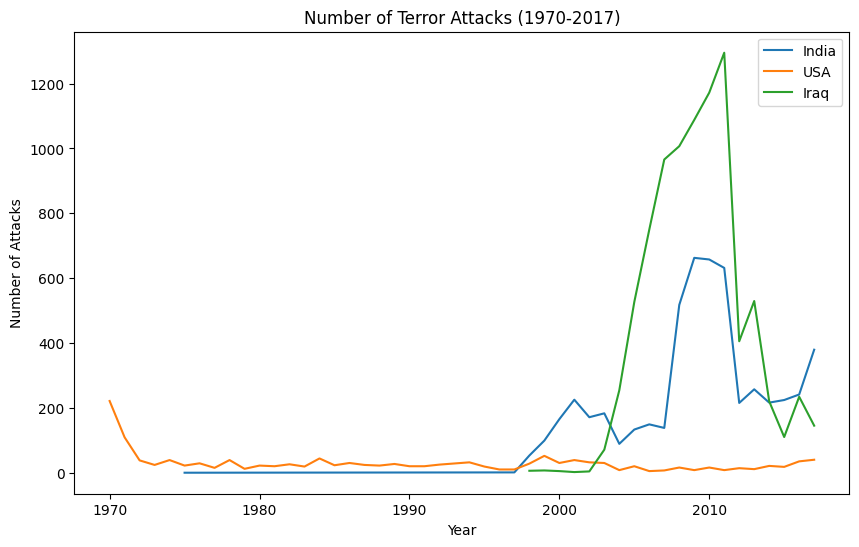

In [38]:
# Group by year for India and USA and Iraq
india_attacks = gtd_india.groupby('Year').size()
usa_attacks = gtd_usa.groupby('Year').size()
iraq_attacks = gtd_iraq.groupby('Year').size()

# Plot attacks over time
plt.figure(figsize=(10,6))
plt.plot(india_attacks, label='India')
plt.plot(usa_attacks, label='USA')
plt.plot(iraq_attacks, label='Iraq')
plt.title('Number of Terror Attacks (1970-2017)')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend()
plt.show()

In [39]:
USA_attacks = gtd_usa['eventid'].count()
print('There were',USA_attacks ,'attacks in USA.')

There were 1426 attacks in USA.


In [40]:
USA_success = gtd_usa.groupby('success').size().reset_index(name='count')
USA_success['percentage'] = USA_success['count'] / USA_attacks * 100
USA_success

,success,count,percentage
0,0,248,17.391304
1,1,1178,82.608696


In [41]:
Iraq_attacks = gtd_iraq['eventid'].count()
print('There were',Iraq_attacks ,'attacks in Iraq.')

There were 8810 attacks in Iraq.


In [42]:
kills_USA = gtd_usa.groupby('AttackType')[['Killed']].sum().reset_index()
kills_USA

,AttackType,Killed
0,Armed Assault,193.0
1,Assassination,27.0
2,Bombing/Explosion,16.0
3,Facility/Infrastructure Attack,6.0
4,Hijacking,3004.0
5,Hostage Taking (Barricade Incident),69.0
6,Hostage Taking (Kidnapping),17.0
7,Unarmed Assault,15.0


In [43]:
attack_types_Iraq = gtd_iraq.groupby(['AttackType','success']).size().reset_index(name='count')
attack_types_Iraq

,AttackType,success,count
0,Armed Assault,0,23
1,Armed Assault,1,1380
2,Assassination,0,285
3,Assassination,1,391
4,Bombing/Explosion,0,134
5,Bombing/Explosion,1,6011
6,Facility/Infrastructure Attack,0,1
7,Facility/Infrastructure Attack,1,85
8,Hijacking,1,1
9,Hostage Taking (Barricade Incident),1,7


Hijacking had dealt the most casualties in Iraq